<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/HW_7_metric_model_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK: Build a metric regression model for the Abalone dataset https://archive.ics.uci.edu/ml/datasets/Abalone**

Target variable: Age (number of rings)
Additionally: Classification, the target variable is column 'sex' (infant, male, female)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report

**Loading the dataset**

In [ ]:
# Завантажимо наш датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['sex', 'length', 'diameter', 'height', 'wh_weight', 'shuck_weight', 'visc_weight', 'shell_weight', 'rings']
df = pd.read_csv(url, header=None, names=column_names)
df.head()

,sex,length,diameter,height,wh_weight,shuck_weight,visc_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Checking for missing values**

In [ ]:
# Перевіряємо чи є пропущені значення
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           4177 non-null   object 
 1   length        4177 non-null   float64
 2   diameter      4177 non-null   float64
 3   height        4177 non-null   float64
 4   wh_weight     4177 non-null   float64
 5   shuck_weight  4177 non-null   float64
 6   visc_weight   4177 non-null   float64
 7   shell_weight  4177 non-null   float64
 8   rings         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**There are no missing values, but we have one categorical feature; let's examine it in relation to the target.**

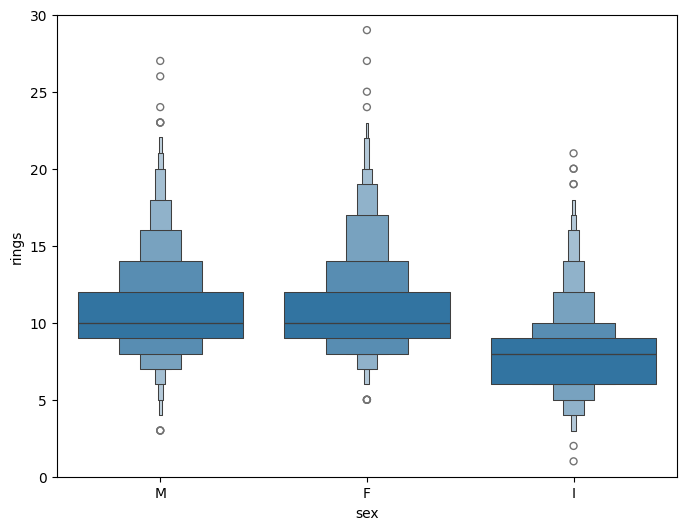

In [ ]:
# Пропущених значень немає, але маємо одну категоріальну фічу, подивимося на неї в зв'язці з таргетом
pd.concat([df["rings"], df["sex"]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x="sex", y="rings", data=df)
fig.axis(ymin=0, ymax=30);

**We see that there is almost no difference in the number of rings between female and male, while infants have fewer rings. We conclude that the number of rings depends on the age of the mollusk rather than its sex.**

In [ ]:
# Бачимо, що різниці в кількості кілець для жіночої та чоловічої статі майже немає, а інфанти мають меншу кількість.
# Робимо висновок, що кількість кілець залежить від віку молюска, а не від статі

**Let's take a look at the summary statistics, focusing particularly on the minimum and maximum values of the target. We see that the number of rings ranges from 1 to 29.**

In [ ]:
# Подивимось опис, нас тут цікавить зокрема мінімальне і максимальне значення таргету, бачимо, що кілець від 1 до 29
df.describe()

,length,diameter,height,wh_weight,shuck_weight,visc_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**Converting the categorical feature "sex" into numerical.**

In [ ]:
# переведемо категоріальну фічу "sex" в числову
df["sex"] = pd.Categorical(df["sex"]).codes

**Let's construct a plot of the distribution of the target variable**

<Axes: xlabel='rings', ylabel='count'>

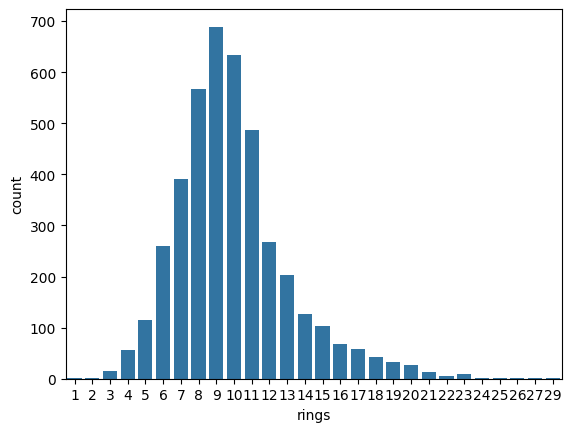

In [ ]:
# Побудуємо графік розподілу таргету:
sns.countplot(data=df, x="rings")

**We see a left-skewed distribution, indicating that the majority of values in the target are clustered around 1/3. Let's also look at the numerical values in detail.**

In [ ]:
# Бачимо, що розподіл зі зміщенням вліво, виглядає так, що найбільше значень в таргеті на межі 1/3. Подивимось додатково числові значення

In [ ]:
df.rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: rings, dtype: int64

**Indeed, the majority of mollusks have 9-10 rings, and the distribution declines significantly beyond 15 up to 29 rings. If we divide the maximum number of rings by 3, then 9-10 rings correspond to approximately 1/3, as observed in the previous graph.**

**We can conclude that there are very few individuals with a large number of rings in the dataset, indicating that relatively younger individuals outnumber the "older" ones.**

In [ ]:
# Так і є, найбільша кількість молюсків мають 9-10 кілець, і розподіл іде від них, після 15 і до 29 спостерігаємо дуже значний спад;
# якщо розділити максимальну кількість кілець на 3, то 9-10 - це якраз 1/3 - як ми і побачили на попередньому графіку.
# Можна зробити висновок, що в датасеті дуже мало осіб з великою кількістю кілець, а значить відносно молодих осіб більше, ніж "старих".

**We can try to clean up the outliers a bit.**

In [ ]:
# Можна спробувати трохи підчистити аутлеєри
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df > lower_bound) & (df < upper_bound)]

**Now let's take a look at the distribution plot.**

<Axes: xlabel='rings', ylabel='count'>

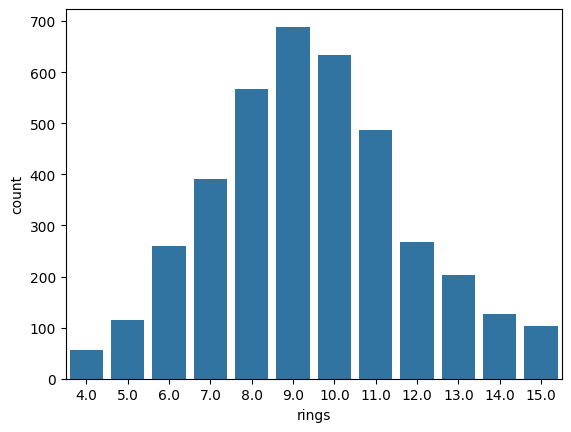

In [ ]:
# Дивимось тепер на графік розподілу:
sns.countplot(data=df_cleaned, x="rings")

**The plot looks better now, it resembles more of a normal distribution. Let's remove the empty values from the dataset.**

In [ ]:
# Графік виглядає краще, вже більше схоже на нормальний розподіл. Тепер видаляємо пусті значення з нашого датасету

In [ ]:
df_cleaned = df_cleaned.dropna()

**We can see that everything is fine**

In [ ]:
# Перевіряємо, бачимо, що все ок
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3781 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           3781 non-null   int8   
 1   length        3781 non-null   float64
 2   diameter      3781 non-null   float64
 3   height        3781 non-null   float64
 4   wh_weight     3781 non-null   float64
 5   shuck_weight  3781 non-null   float64
 6   visc_weight   3781 non-null   float64
 7   shell_weight  3781 non-null   float64
 8   rings         3781 non-null   float64
dtypes: float64(8), int8(1)
memory usage: 269.5 KB


**Let's consider the correlation matrix**

<Axes: >

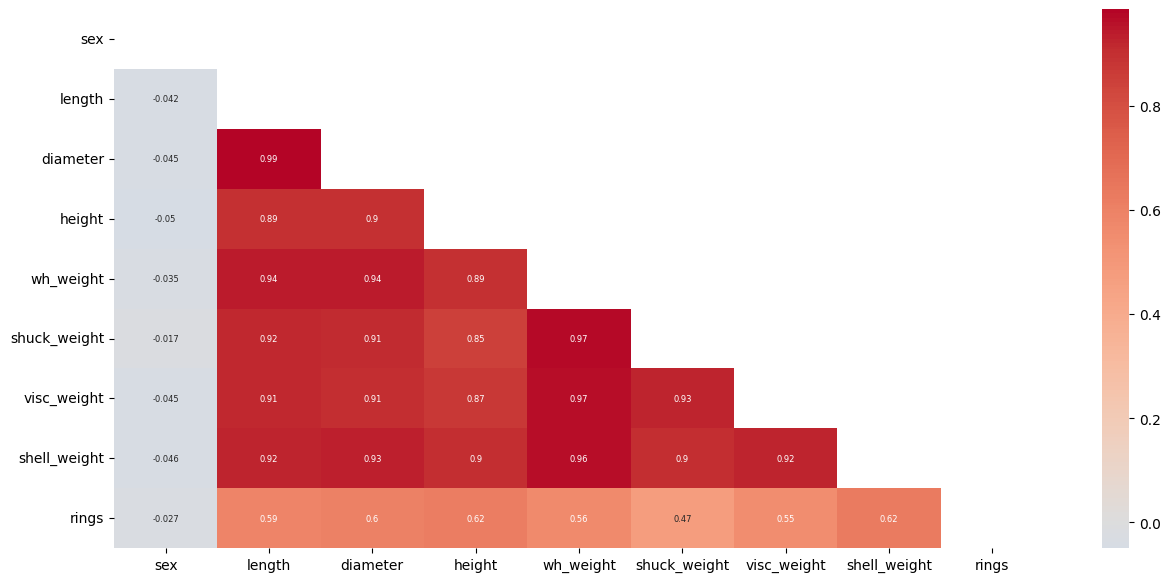

In [ ]:
# Розглянемо матрицю кореляцій
corr_df = df_cleaned.corr()
plt.figure(figsize=(15, 7))
matrix = np.triu(corr_df.corr())
sns.heatmap(corr_df, cmap="coolwarm", annot=True, annot_kws={"fontsize":6}, center= 0, mask=matrix)

**We see that there is a very high correlation across almost all parameters. Let's try creating new features to achieve somewhat more reasonable training results for our future model. After creating each new feature, I updated the correlation matrix. To keep the results before and after, and to avoid cluttering the notebook, I will show the final overall result.**

In [ ]:
# Бачимо, що дуже висока кореляція майже по всім параметрам. Спробуємо створити нові фічі,
# щоб отримати більш-менш адекватні результати тренування нашої майбутньої моделі

# Після створення кожної нової фічі, я оновлювала матрицю кореляцій,
# але щоб залишити результат до та після, і не засмічувати ноутбук, покажу вже кінцевий загальний результат

**Calculating the ratio of the weight of the shell itself to the total weight:**

In [ ]:
# Рахуємо відношення ваги самої мушлі до загальної ваги
df_cleaned.insert(8, "shell_body_ratio", df_cleaned["shell_weight"] / df_cleaned["wh_weight"])

**Creating another feature - volume, based on the diameter and height of the mollusk (calculating using the formula for the volume of a cylinder):**

In [ ]:
# Створюємо ще одну фічу - об'єм, на основі діаметру та висоти молюска (рахуємо по формулі об'єму циліндра)
df_cleaned.insert(1, "volume", np.pi * (df_cleaned["diameter"] / 2) ** 2 * df_cleaned["height"])

**The next feature is the ratio of length to diameter:**

In [ ]:
# Наступна фіча - відношення довжини до діаметру
df_cleaned.insert(4, "len_d_ratio", df_cleaned["length"] / df_cleaned["diameter"])

**Calculating the total weight:**

In [ ]:
# Рахуємо загальну вагу
df_cleaned.insert(6, "total weight", df_cleaned["wh_weight"] + df_cleaned["shuck_weight"] + df_cleaned["visc_weight"] + df_cleaned["shell_weight"])

**Let's keep only the total weight**

In [ ]:
# Залишимо тільки загальну вагу
df_cleaned = df_cleaned.drop(["wh_weight", "shuck_weight", "visc_weight", "shell_weight"], axis=1)

**Let's take another look at the correlation matrix**

<Axes: >

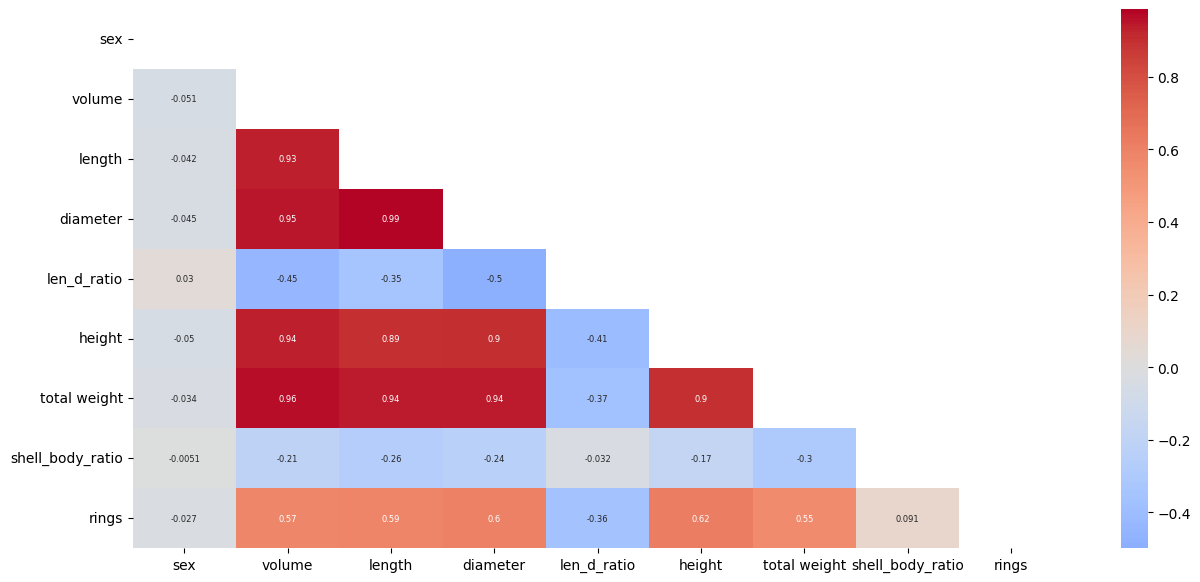

In [ ]:
# Подивимось ще раз на матрицю кореляцій
corr_df = df_cleaned.corr()
plt.figure(figsize=(15, 7))
matrix = np.triu(corr_df.corr())
sns.heatmap(corr_df, cmap="coolwarm", annot=True, annot_kws={"fontsize":6}, center= 0, mask=matrix)

**We can see that we have slightly diluted the dependencies**

In [ ]:
# Бачимо, що трошки розбавили наші залежності

**Let's separately examine the correlations with the target**

In [ ]:
# Подивимось окремо кореляції з нашим таргетом
corr_with_rings = df_cleaned.corr().rings.sort_values(ascending=False, key = lambda x: abs(x)).to_frame()
corr_with_rings.drop("rings")

,rings
height,0.615657
diameter,0.604331
length,0.587108
volume,0.574517
total weight,0.554882
len_d_ratio,-0.361573
shell_body_ratio,0.091179
sex,-0.026766


**Basically, we have average values, nothing critical.**

In [ ]:
# В принципі, маємо середні показники, нічого критичного

**Let's build boxplots to examine the relationships between variables and the target**

<Figure size 400x300 with 0 Axes>

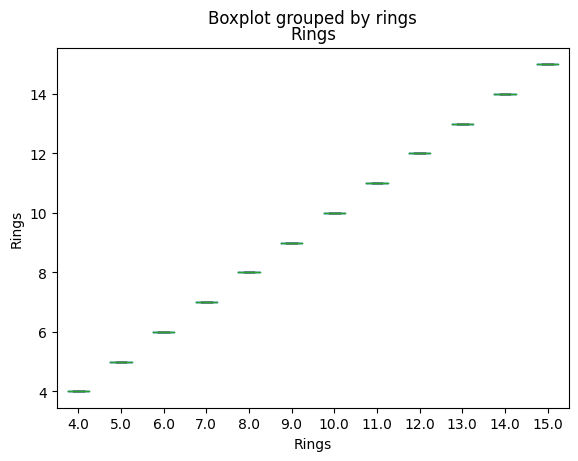

<Figure size 400x300 with 0 Axes>

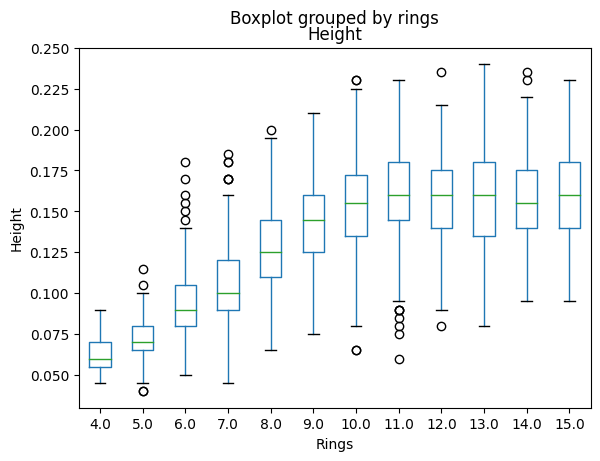

<Figure size 400x300 with 0 Axes>

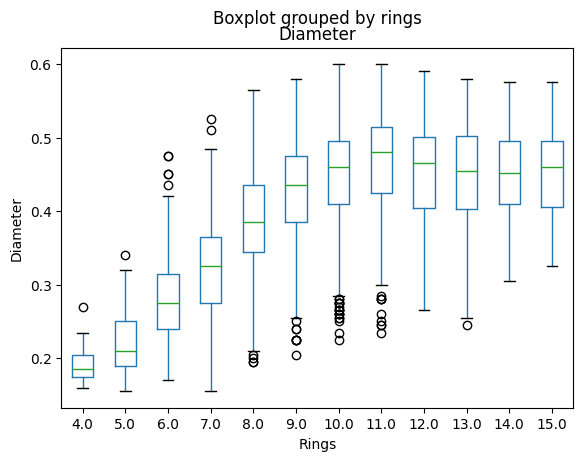

<Figure size 400x300 with 0 Axes>

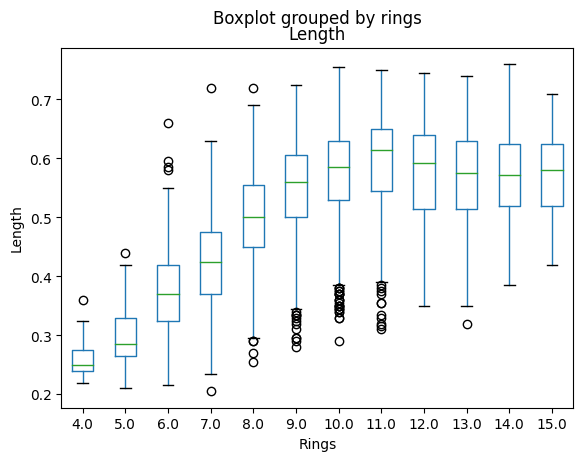

<Figure size 400x300 with 0 Axes>

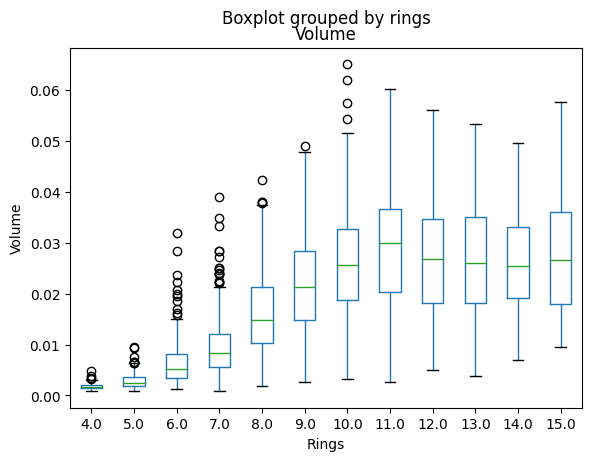

<Figure size 400x300 with 0 Axes>

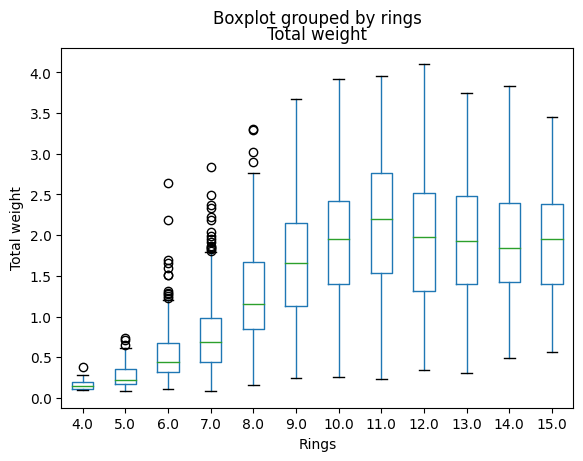

<Figure size 400x300 with 0 Axes>

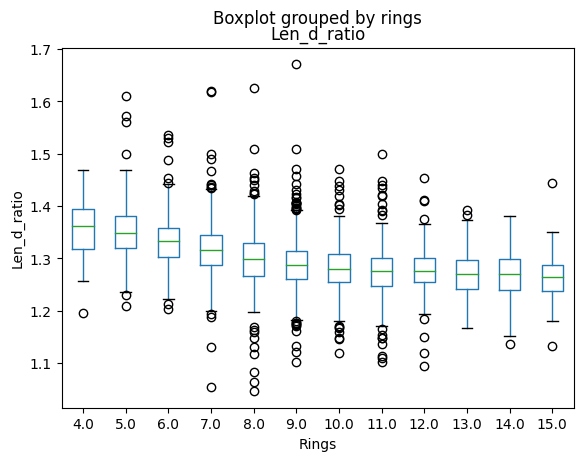

<Figure size 400x300 with 0 Axes>

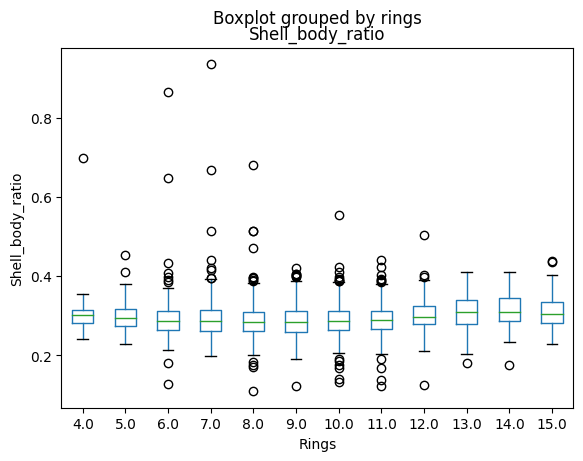

In [ ]:
# Побудуємо боксплоти, щоб подивитися залежності змінних і таргету
features = corr_with_rings[abs(corr_with_rings.rings) > 0.03].index.tolist()
for column in features:
    plt.figure(figsize=(4, 3))
    df_cleaned.boxplot(column=column, by="rings", grid=False)
    plt.title(f"{column.capitalize()}")
    plt.xlabel("Rings")
    plt.ylabel(column.capitalize())

    plt.show()

**We see that almost all shell size indicators increase with the number of rings, which is logical - generally, older shells are larger**

In [ ]:
# Бачимо, що майже всі показники розміру мушлі зростають разом з кількістю кілець, що, в принципі, логічно - чим старша мушля, тим вона більше

**Splitting the dataset into a feature matrix**

In [ ]:
# Розділяємо датасет на матрицю фіч

# for regression
# для регресії:
X_reg = df_cleaned.drop("rings", axis=1)
y_reg = df_cleaned["rings"]

# for classification
# і для класифікації:
X_cls = df_cleaned.drop("sex", axis=1)
y_cls = df_cleaned["sex"]

**Scaling the features**

In [ ]:
# Масштабуємо фічі
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_cls_scaled = scaler.fit_transform(X_cls)

**Splitting the dataset into training and testing parts**

In [ ]:
# Розділяємо датасет на тренувальну та тестову частини
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

**The next steps**

In [ ]:
# creating a metric regression model using KNeighborsRegressor
# Будуємо метричну модель регресії з використанням KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=9)

# cross-validation
# Робимо крос-валідацію:
cv_scores = cross_val_score(regressor, X_reg_train, y_reg_train, cv=5)

# training the model on the training data
# Тренуємо модель на тренувальних даних:
regressor.fit(X_reg_train, y_reg_train)

# calculating the evaluation on the training and testing samples
# Розраховуємо оцінку на тренувальній та тестовій вибірці:
train_score = regressor.score(X_reg_train, y_reg_train)
test_score = regressor.score(X_reg_test, y_reg_test)

# evaluating the quality of the regression
# Робимо оцінку якості регресії
y_reg_pred = regressor.predict(X_reg_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

# print the results
# Дивимося оцінку по фолдам а також по тренувальній та тестовій виборкам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)
print(f"Mean Squared Error (Regression): {mse}")
print(f"Mean Absolute Error (Regression): {mae}")
print(f"R2 Score (Regression): {r2}")

Cross-Validation Scores: [0.4533551  0.43976036 0.42043837 0.49420379 0.45526402]
Train Score: 0.5649907842530854
Test Score: 0.4816824944920215
Mean Squared Error (Regression): 2.8858391636903304
Mean Absolute Error (Regression): 1.309114927344782
R2 Score (Regression): 0.4816824944920215


**We see that the scores across 5 folds are nearly identical, indicating that our model is quite stable. Scores on the training and test samples show normal performance. The Test Score and R2 Score have the same value, suggesting the model generalizes well to the test data. However, we have elevated MSE and MAE, so let's examine the delta between actual and predicted target values.**

In [ ]:
# Бачимо, що оцінки по 5 фолдам у нас вийшли майже однаковими, а значить модель в нас достатньо стабільна.
# Оцінки на тренувальній та тестовій виборках мають нормальні показники. Test Score і R2 Score мають однаковий показник,
# що може означати, що модель добре узагальнює на тестових даних. Але маємо завищені MSE і MAE, тож подивимось дельту між
# фактичними і прогнозованими значеннями таргету

In [ ]:
df_1 = pd.DataFrame({"target": y_reg_test, "predict": y_reg_pred})
df_1["delta"] = df_1["predict"] - df_1["target"]

delta_df = pd.DataFrame({"target": df_1["target"], "predict": df_1["predict"], "delta": df_1["delta"]})

sorted_delta_df = delta_df.sort_values(by="delta", ascending=False)

sorted_delta_df.head()

,target,predict,delta
59,7.0,11.111111,4.111111
2650,8.0,11.777778,3.777778
2164,5.0,8.555556,3.555556
518,4.0,7.555556,3.555556
3824,7.0,10.444444,3.444444


**We have a delta of 4 and values close to 4. Let's take a look at row 59 compared to its neighbors**

In [ ]:
# Маємо дельту 4 і близькі до 4, подивимось на рядок 59 в порівнянні з сусідніми.
df.iloc[55:60]

,sex,length,diameter,height,wh_weight,shuck_weight,visc_weight,shell_weight,rings
55,0,0.500,0.400,0.140,0.6615,0.2565,0.1755,0.220,8
56,2,0.445,0.350,0.120,0.4425,0.1920,0.0955,0.135,8
57,2,0.470,0.385,0.135,0.5895,0.2765,0.1200,0.170,8
58,1,0.245,0.190,0.060,0.0860,0.0420,0.0140,0.025,4
59,0,0.505,0.400,0.125,0.5830,0.2460,0.1300,0.175,7


**We see that the shell with 7 rings is quite large compared to, for example, rows 56 and 57 where there are 8 rings. However, rows 56 and 57 correspond to male ('M') gender, while row 59 corresponds to female ('F').**

In [ ]:
# Бачимо, що мушля з кількістю кілець 7 достатньо велика, в порівнянні, наприклад з рядками 56 і 57, де кілець 8.
# Та все ж рядки 56 і 57 відповідають статі M, а 59 - F

**So let's take a look at the dependence of shell diameter on their sex:**

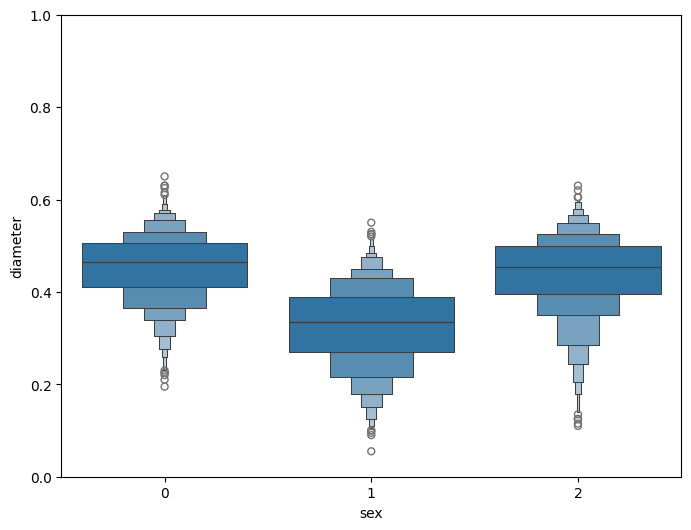

In [ ]:
# Тож подивимось ще залежність діаметру мушель від іх статі
pd.concat([df["diameter"], df["sex"]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x="sex", y="diameter", data=df)
fig.axis(ymin=0, ymax=1);

**We observe a similar situation as with the number of rings - females (0) and males (2) show almost identical growth indicators. But shells of female sex (0) are slightly larger on average than those of male sex (2).We conclude that our error metrics are normal for this dataset.**

In [ ]:
# Бачимо подібну ситуацію, як і з кількістю кілець - жіноча (0) і чоловіча статі (2) мають майже однакові показники росту,
# але мушлі жіночої статі в середньому трохи більші, ніж чоловічої
# Робимо висновок, що все ж наші показники помилок нормальні для даного датасету

**Creating a metric classification model and evaluating its quality**

In [ ]:
# Будуємо метричну модель класифікації
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_cls_train, y_cls_train)
y_cls_pred = classifier.predict(X_cls_test)

# Оцінюємо якість класифікації
accuracy = accuracy_score(y_cls_test, y_cls_pred)
print(f"Accuracy (Classification): {accuracy}")
print("Classification Report:")
print(classification_report(y_cls_test, y_cls_pred))

Accuracy (Classification): 0.5640686922060766
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.49      0.47       216
           1       0.70      0.74      0.72       282
           2       0.50      0.43      0.46       259

    accuracy                           0.56       757
   macro avg       0.55      0.55      0.55       757
weighted avg       0.56      0.56      0.56       757



**CONCLUSION: We see that only infants have somewhat normal accuracy metrics across classes. Perhaps to improve the overall picture, it makes sense to combine M and F into one class and consider adults and infants separately.**

In [ ]:
# Бачимо, що більш-менш нормальні показники точності по класам мають тільки інфанти. Можливо для покращення загальної картини
# є сенс об'єднати M та F в один клас, і розглядати дорослих осіб і "дітей".